<a href="https://colab.research.google.com/github/HariPN13/SignalProcessingTutorial/blob/master/Wormos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import  numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import tensorflow as tf
from keras.models import Sequential  
from keras.layers import *  

Using TensorFlow backend.


Preprocessing data for classification: Pandas and Numpy

In [2]:
Location = 'https://raw.githubusercontent.com/HariPN13/WormCalcium/master/DataCSV1.csv?token=ALIOWLO7H4435A6FPLWA3PK7A2JCC'
df = pd.read_csv(Location)
df = df.fillna(0)

Defining X as the input parameters for the classifier = calcium signal of 68 neurons over the timesteps.

In [3]:
X = np.zeros((398,69))
for i in range(1,69):
  Xi = np.array(df['Neuron ' + str(i)])
  X[:,i] = Xi



Choosing 320 samples as training space.

In [4]:
X_train = X[0:150,:]
X_test = X[150:398,:]

Defining output Y as the behaviour shown by the worm.

In [5]:
Y = np.zeros((398,1))
Y[:,0] = np.array(df['behavior'])

Once more selecting 320 samples to train on.

In [6]:
Y_train = Y[0:150,:]
Y_test = Y[150:398,:]

Running a OneVsRest classifier to classify behaviour.

In [7]:
clf = OneVsRestClassifier(SVC()).fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9193548387096774

Moving on to Principal Component Analysis

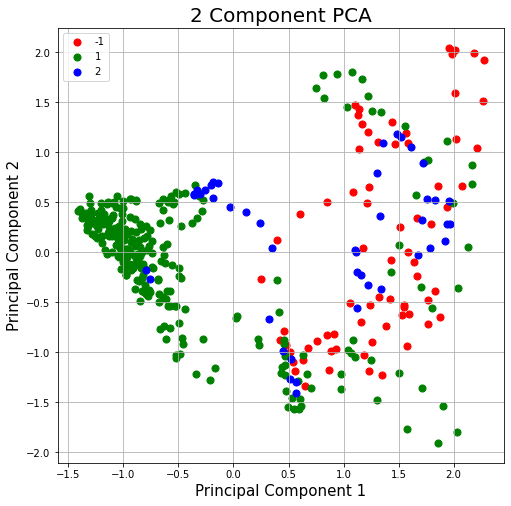

In [8]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['behavior']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
targets = [-1, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['behavior'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()



K-Means Clustering

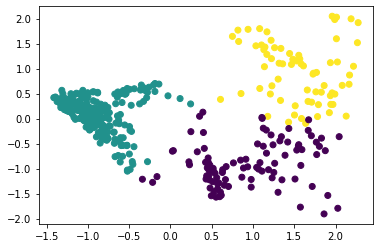

In [9]:
yk_pred = KMeans(n_clusters=3).fit_predict(X)
plt.scatter(finalDf['principal component 1'],finalDf['principal component 2'], c=yk_pred)

In [19]:
pca80 = PCA(0.8)
Xn = pca80.fit_transform(X)

#j = no. of samples in training
j = 320

Xn_train = Xn[0:j,:]
Xn_test = Xn[j:,:]

Yn_train = Y[0:j,:]
Yn_test = Y[j:,:]
train_labels = np.where(Yn_train==-1, 0, Yn_train)
test_labels = np.where(Yn_test==-1, 0, Yn_test)


In [20]:
model = Sequential()    
model.add(Dense(units=1,input_shape=(7,)))
model.add(Activation('softmax'))

#further layers
model.add(Dense(units=3)) #output layer   
model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(Xn_train, train_labels, epochs=10)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 8         
_________________________________________________________________
activation_4 (Activation)    (None, 1)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 6         
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
320/320 [==============================] - 0s 205us/step - loss: 1.4207 - accuracy: 0.0000e+00
Epoch 2/10
320/320 [==============================] - 0s 42us/step - loss: 1.4028 - accuracy: 0.0000e+00
Epoch 3/10
320/320 [==============================] - 0s 40us/step - loss: 1.3857 - accuracy: 0.0000e+00
Epoch 4/10
320/320 [==============================] - 0s 52us/step - los

Testing

In [21]:
test_loss, test_acc = model.evaluate(Xn_test,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


Test accuracy: 0.0


Prediction